<a href="https://colab.research.google.com/github/Bagito999/Deep-Learning/blob/main/MLP_TensorFlow_RegresiUTSTelkom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
)

import warnings, math
warnings.filterwarnings('ignore')

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Deep Learning/RegresiUTSTelkom.csv')

print("Dataset Overview")
print(data.head())
print("\nMissing Values:\n", data.isnull().sum())
print("\nData Types:\n", data.dtypes)


Dataset Overview
   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.2

In [5]:
# Define target and features
target = data.columns[0]
features = data.columns[1:]

X = data[features]
y_reg = data[target]
y_cls = (y_reg > y_reg.median()).astype(int)

# Split data
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42)

# Feature types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include='object').columns

# Preprocessing
pipeline = ColumnTransformer([
    ('num_pipeline', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols)
], remainder='drop')

pipeline.fit(X_train)

X_train_reg_prep = pipeline.transform(X_train)
X_test_reg_prep = pipeline.transform(X_test)
X_train_cls_prep = pipeline.transform(X_train_cls)
X_test_cls_prep = pipeline.transform(X_test_cls)

print("Shape After Preprocessing")
print("Train:", X_train_reg_prep.shape, " Test:", X_test_reg_prep.shape)

Shape After Preprocessing
Train: (412275, 90)  Test: (103069, 90)


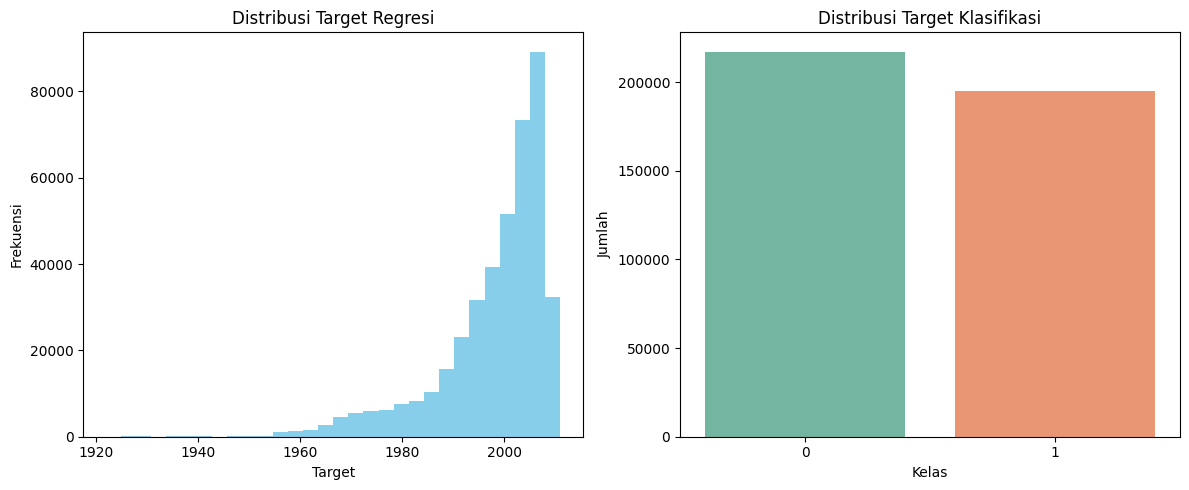

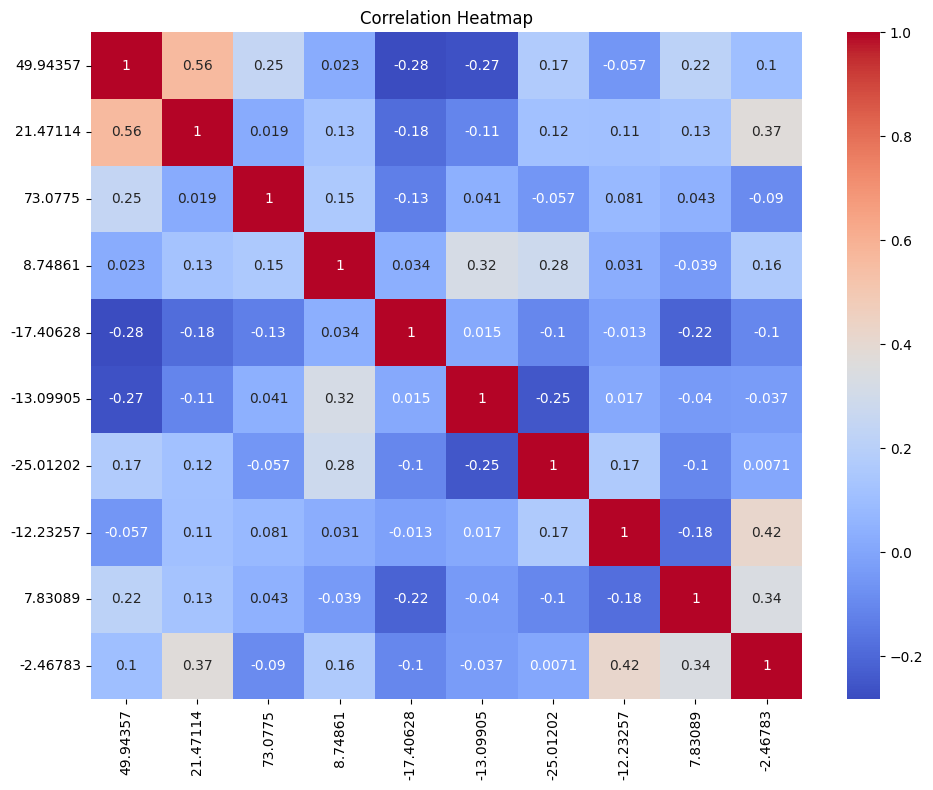

In [6]:
# Visualizations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y_train_reg, bins=30, color='skyblue')
plt.title("Distribusi Target Regresi")
plt.xlabel("Target")
plt.ylabel("Frekuensi")

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_cls, palette='Set2')
plt.title("Distribusi Target Klasifikasi")
plt.xlabel("Kelas")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

# Correlation Heatmap (if no categorical)
if len(cat_cols) == 0:
    corr_matrix = X_train.corr().iloc[:10, :10]
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

#Regression

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,513 (252.00 KB)

 Trainable params: 64,513 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 225844.4062 - val_loss: 2279.1797
Epoch 2/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 15633.5537 - val_loss: 778.4447
Epoch 3/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 10670.5029 - val_loss: 267.4550
Epoch 4/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 8756.9482 - val_loss: 572.1815
Epoch 5/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 7724.7324 - val_loss: 315.7120
Epoch 6/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 6293.9780 - val_loss: 260.4810
Epoch 7/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 4538.9761 - val_loss: 167.5435
Epoch 8/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 2327.2400 - val_loss: 101.9501
Epoch 9/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 533.8726 - val_loss: 85.9203
Epoch 10/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 102.7538 - val_loss: 77.3052
Epoch 11/30
10307/10307 ━━━━━━━━━━━━━━

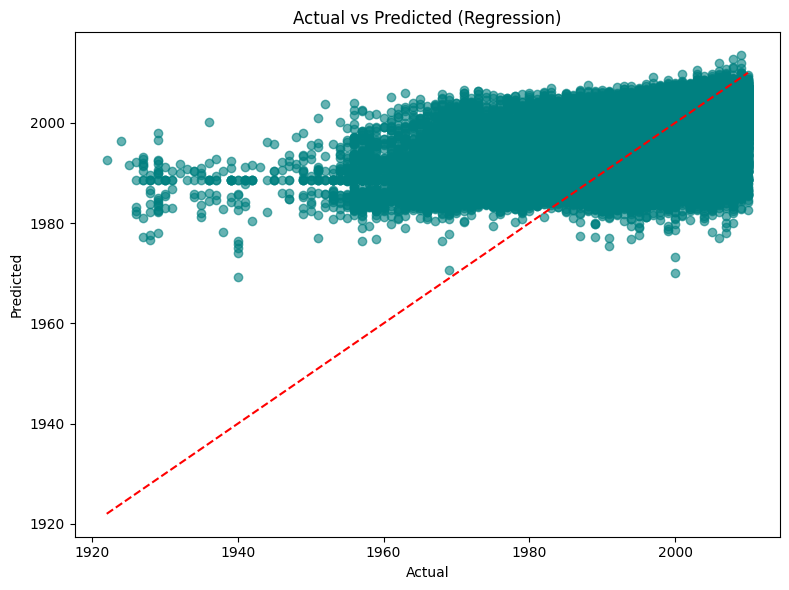

In [7]:
# Regression Model
def build_regression_model(input_size):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_size,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse')
    return model

reg_model = build_regression_model(X_train_reg_prep.shape[1])
reg_model.summary()

reg_history = reg_model.fit(
    X_train_reg_prep, y_train_reg,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

# Evaluate regression
y_pred_reg = reg_model.predict(X_test_reg_prep)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print("\n[Regression Evaluation]")
print(f"MSE: {mse:.4f} \nRMSE: {rmse:.4f}  \nR²: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, color='teal', alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Regression)')
plt.tight_layout()
plt.show()

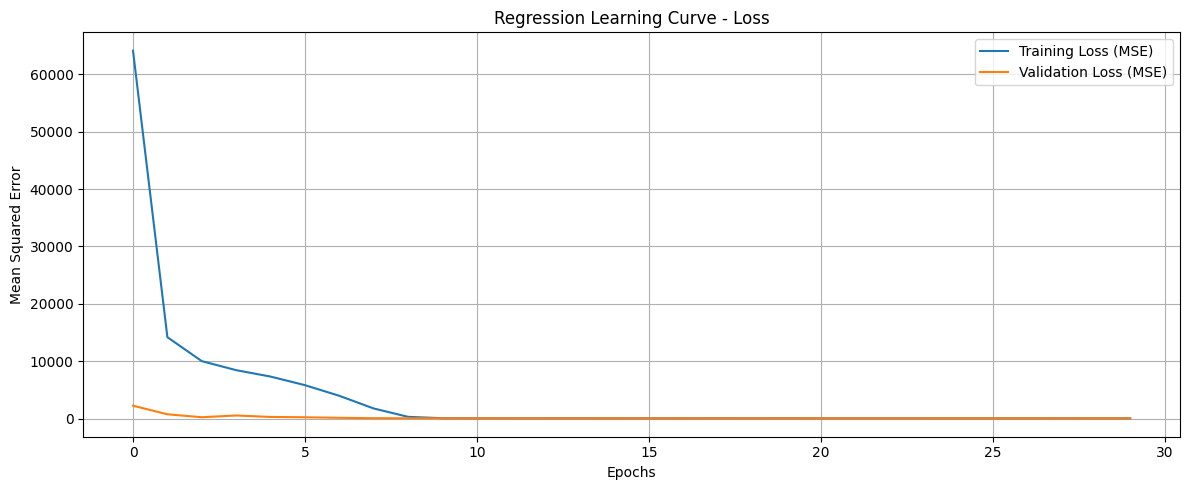

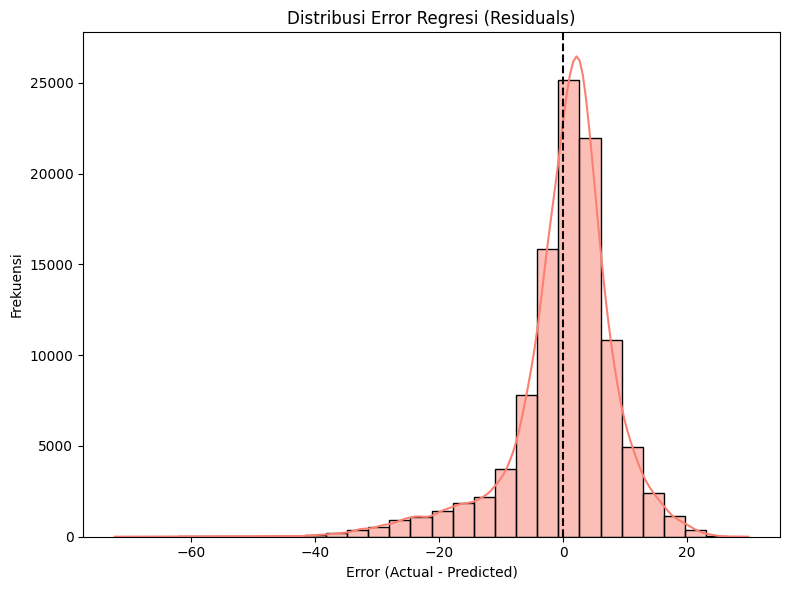

In [8]:
# Visualisasi learning curve untuk model regresi
plt.figure(figsize=(12, 5))

# Plot Loss (MSE)
plt.subplot(1, 1, 1)
plt.plot(reg_history.history['loss'], label='Training Loss (MSE)')
plt.plot(reg_history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Regression Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Regression Error Distribution
errors = y_test_reg - y_pred_reg.flatten()

plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='salmon', bins=30)
plt.title("Distribusi Error Regresi (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frekuensi")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

In [18]:
# Determine best metrics for regression
print("--- BEST METRICS FOR REGRESSION ---")
print("Regression evaluation metrics summary:")

metrics_reg = {
    'MSE': mse,
    'RMSE': rmse,
    'R²': r2
}

# Tampilkan metrik dengan penjelasan
print(f"MSE : {mse:.4f} (semakin kecil semakin baik)")
print(f"RMSE: {rmse:.4f} (semakin kecil semakin baik, satuan asli target)")
print(f"R²  : {r2:.4f} (semakin mendekati 1 semakin baik, koefisien determinasi)")

# Tentukan metrik terbaik (khusus R² ingin maksimum, lainnya minimum)
best_metric_reg = max(
    metrics_reg.items(),
    key=lambda x: x[1] if x[0] == 'R²' else -x[1]
)

print(f"\nBest metric based on interpretability and target objective: {best_metric_reg[0]} = {best_metric_reg[1]:.4f}")

--- BEST METRICS FOR REGRESSION ---
Regression evaluation metrics summary:
MSE : 74.8618 (semakin kecil semakin baik)
RMSE: 8.6523 (semakin kecil semakin baik, satuan asli target)
R²  : 0.3693 (semakin mendekati 1 semakin baik, koefisien determinasi)

Best metric based on interpretability and target objective: R² = 0.3693


#Classification

In [12]:
# Classification Model
def build_classification_model(input_size):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_size,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

clf_model = build_classification_model(X_train_cls_prep.shape[1])
clf_model.summary()

clf_history = clf_model.fit(
    X_train_cls_prep, y_train_cls,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

# Evaluate classification
y_prob_cls = clf_model.predict(X_test_cls_prep)
y_pred_cls = (y_prob_cls > 0.5).astype(int)

acc = accuracy_score(y_test_cls, y_pred_cls)
prec = precision_score(y_test_cls, y_pred_cls)
rec = recall_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)
auc_val = roc_auc_score(y_test_cls, y_prob_cls)

print("\n[Classification Evaluation]")
print(f"Accuracy: {acc:.4f} \nPrecision: {prec:.4f} \nRecall: {rec:.4f} \nF1 Score: {f1:.4f} \nAUC: {auc_val:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │        23,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,513 (252.00 KB)

 Trainable params: 64,513 (252.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.6987 - loss: 0.5814 - val_accuracy: 0.7258 - val_loss: 0.5415
Epoch 2/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.7245 - loss: 0.5465 - val_accuracy: 0.7309 - val_loss: 0.5360
Epoch 3/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.7304 - loss: 0.5391 - val_accuracy: 0.7323 - val_loss: 0.5320
Epoch 4/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.7342 - loss: 0.5336 - val_accuracy: 0.7365 - val_loss: 0.5280
Epoch 5/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.7360 - loss: 0.5311 - val_accuracy: 0.7379 - val_loss: 0.5275
Epoch 6/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7372 - loss: 0.5286 - val_accuracy: 0.7391 - val_loss: 0.5266
Epoch 7/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.7372 - loss: 0.5275 - val_accuracy: 0.7388 - val_loss: 0.5267
Epoch 8/30
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 

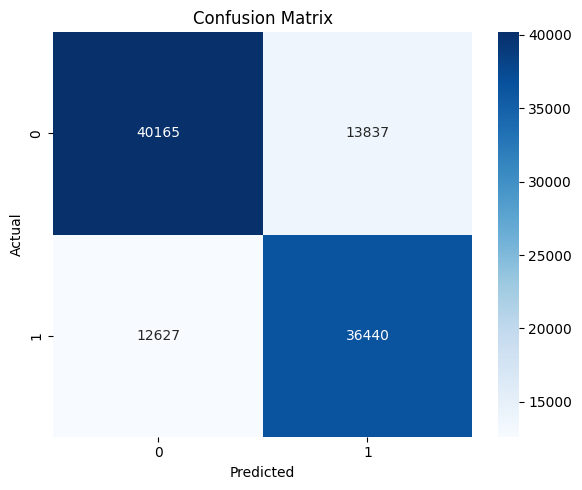

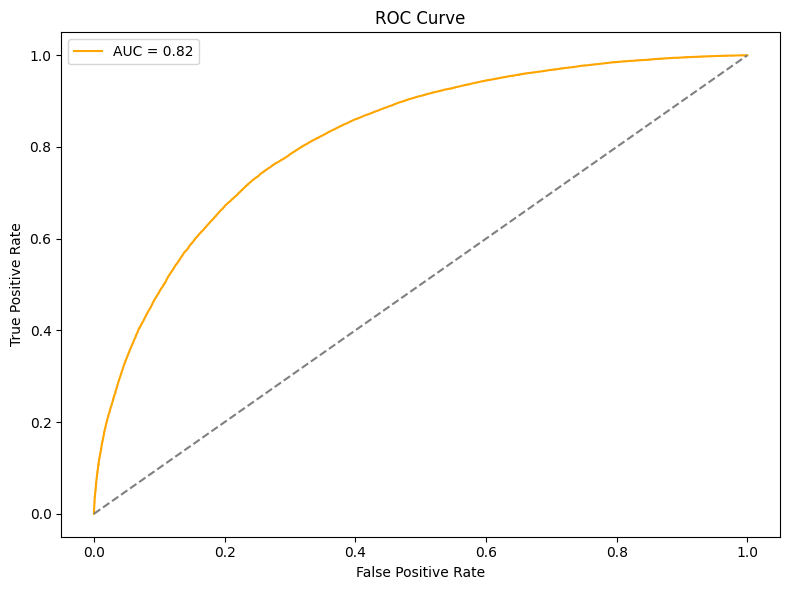

In [14]:
# Confusion Matrix
cmatrix = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6, 5))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_cls, y_prob_cls)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_val:.2f}", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

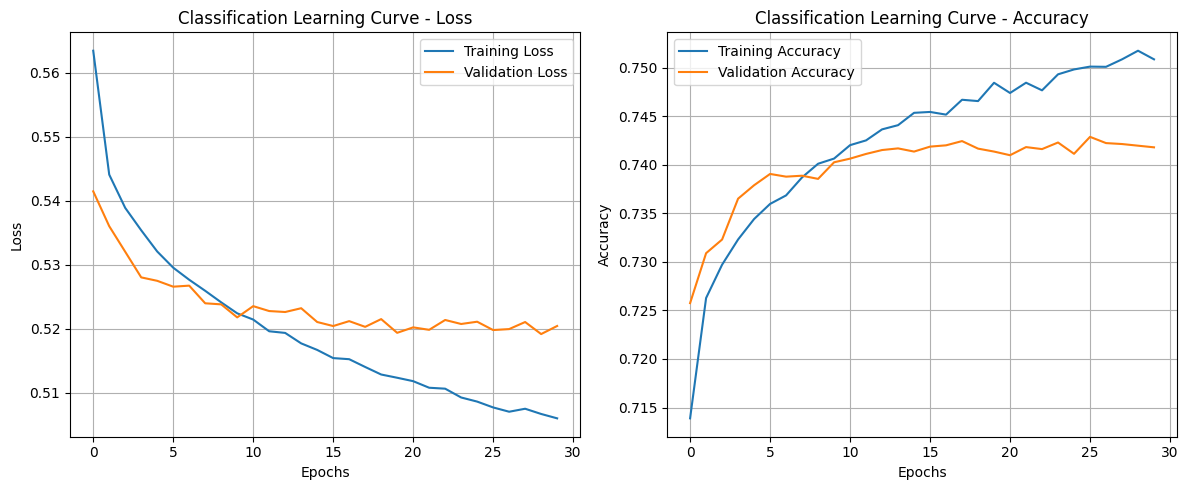

In [15]:
# Visualisasi learning curve untuk model klasifikasi
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(clf_history.history['loss'], label='Training Loss')
plt.plot(clf_history.history['val_loss'], label='Validation Loss')
plt.title('Classification Learning Curve - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(clf_history.history['accuracy'], label='Training Accuracy')
plt.plot(clf_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Classification Learning Curve - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [17]:
# Determine best metrics for classification
print("--- BEST METRICS FOR CLASSIFICATION ---")
print("Classification evaluation metrics summary:")

metrics_class = {
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1-Score': f1,
    'AUC-ROC': auc_val
}

# Tampilkan metrik dengan penjelasan
print(f"Accuracy : {acc:.4f} (proporsi prediksi benar secara keseluruhan)")
print(f"Precision: {prec:.4f} (dari yang diprediksi positif, seberapa banyak yang benar)")
print(f"Recall   : {rec:.4f} (dari yang benar-benar positif, seberapa banyak yang terdeteksi)")
print(f"F1-Score : {f1:.4f} (harmonik rata-rata Precision dan Recall)")
print(f"AUC-ROC  : {auc_val:.4f} (kemampuan model membedakan kelas positif dan negatif)")

# Tentukan metrik terbaik (semua ingin maksimum)
best_metric_class = max(metrics_class.items(), key=lambda x: x[1])

print(f"\nBest metric based on performance: {best_metric_class[0]} = {best_metric_class[1]:.4f}")


--- BEST METRICS FOR CLASSIFICATION ---
Classification evaluation metrics summary:
Accuracy : 0.7432 (proporsi prediksi benar secara keseluruhan)
Precision: 0.7248 (dari yang diprediksi positif, seberapa banyak yang benar)
Recall   : 0.7427 (dari yang benar-benar positif, seberapa banyak yang terdeteksi)
F1-Score : 0.7336 (harmonik rata-rata Precision dan Recall)
AUC-ROC  : 0.8198 (kemampuan model membedakan kelas positif dan negatif)

Best metric based on performance: AUC-ROC = 0.8198
